In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
#Model 1: the SIR model
# parameter values
R0 = 2.5 # Basic reproduction number
t_infective = 5.6+3.6

# initial number of infected and recovered individuals
i_initial = 1/21480000 #total population in Florida is 21480000
r_initial = 0.00
s_initial = 1 - i_initial - r_initial
gamma = 1/t_infective
beta = R0*gamma

In [3]:
def deriv_SIR(x, t, beta, gamma):
    s, i, r = x
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt =  gamma * i
    return [dsdt, didt, drdt]

In [4]:
#simulation for 600 days
t = np.linspace(0, 600, 600) 
x_initial = s_initial, i_initial, r_initial
soln = odeint(deriv_SIR, x_initial, t, args=(beta, gamma))
s, i, r = soln.T

In [5]:
#plots
def plotcovid(t,s,i,e=None):
    fig = plt.figure(figsize = (12,6))
    ax = [fig.add_subplot(221),
          fig.add_subplot(222)]
    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Removed')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')
  
    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    if max(i)<=0.02:
        ax[1].set_ylim(0, 0.1)
    else:
        ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')
    
    
    for a in ax:
        a.legend(loc='center right')


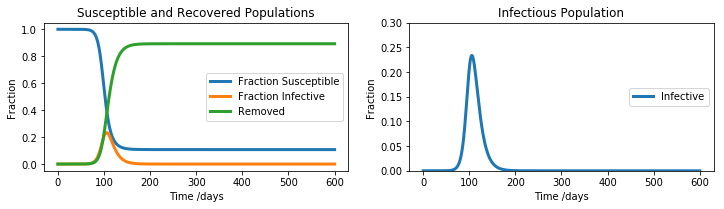

In [6]:
plotcovid(t,s,i)

In [7]:
#Model 2: the SEIR model
# parameter values
R0 = 2.5
t_incubation = 5.6
t_infective = 3.6

#initial number of infected and recovered individuals
e_initial = 1/21480000
i_initial = 0.00
r_initial = 0.00
s_initial = 1-e_initial - i_initial -r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

In [8]:
def deriv_SEIR(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -beta * s * i
    dedt =  beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]


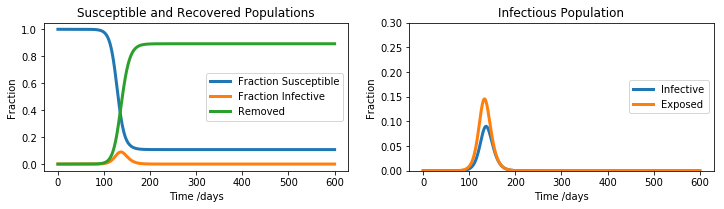

In [9]:
t = np.linspace(0, 600, 600)
x_initial = s_initial, e_initial, i_initial, r_initial
soln = odeint(deriv_SEIR, x_initial, t, args=(alpha, beta, gamma))
s, e, i, r = soln.T

plotcovid(t, s, i, e)

In [10]:
#Add social distancing to the SEIR model u=0.2
# parameter values
u = 0.2
R0 = 2.5
t_incubation = 5.6
t_infective = 3.6

# initial number of infected and recovered individuals
e_initial = 1/21480000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

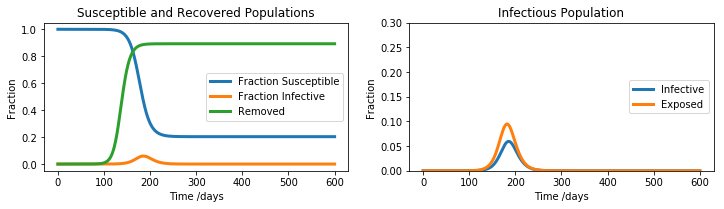

In [11]:
# SEIR model with social distancing differential equations.
def deriv_sd(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u)*beta * s * i
    dedt =  (1-u)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 600, 600)
x_initial = s_initial, e_initial, i_initial, r_initial
soln_sd = odeint(deriv_sd, x_initial, t, args=(alpha, beta, gamma))
s_sd, e_sd, i_sd, r_sd = soln_sd.T

plotcovid(t, s_sd, i_sd, e_sd)

In [12]:
#Add social distancing to the SEIR model u=0.2
# parameter values
u = 0.4
R0 = 2.5
t_incubation = 5.6
t_infective = 3.6

# initial number of infected and recovered individuals
e_initial = 1/21480000
i_initial = 0.00
r_initial = 0.00
s_initial = 1 - e_initial - i_initial - r_initial

alpha = 1/t_incubation
gamma = 1/t_infective
beta = R0*gamma

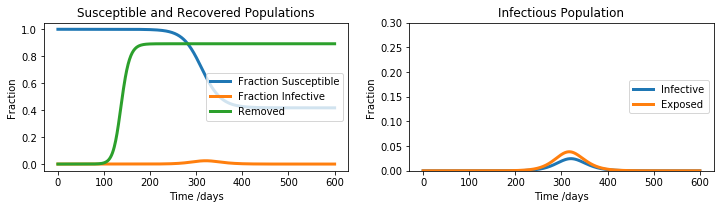

In [13]:
# SEIR model with social distancing differential equations.
def deriv_sd(x, t, alpha, beta, gamma):
    s, e, i, r = x
    dsdt = -(1-u)*beta * s * i
    dedt =  (1-u)*beta * s * i - alpha * e
    didt = alpha * e - gamma * i
    drdt =  gamma * i
    return [dsdt, dedt, didt, drdt]

t = np.linspace(0, 600, 600)
x_initial = s_initial, e_initial, i_initial, r_initial
soln_sd = odeint(deriv_sd, x_initial, t, args=(alpha, beta, gamma))
s_sd, e_sd, i_sd, r_sd = soln_sd.T

plotcovid(t, s_sd, i_sd, e_sd)

In [14]:
#Model 4: SIR model considering births, natural deaths, and full vaccination rate
R0 = 2.5
t_infective = 5.6+3.6
mu = 0.01 #birth rate = death rate = 1%
gamma = 1/t_infective
beta = R0*gamma
theta1 = 0.46 # current full vaccination rate
theta2=0.8 #proposed full vaccination rate

In [15]:
def SIR_birth_death_vax(V, t, params):
    """SIR model with balanced birth/deaths and newborn vaccination."""
    S, I, R = V
    N = S + I + R
    mu, theta, beta, gamma = params
    dsdt = mu * (1 - theta)*N - beta * S * I / N - mu * S
    didt = beta * S * I / N - gamma * I - mu * I
    drdt = mu * theta*N + gamma * I - mu * R
    return [dsdt, didt, drdt]

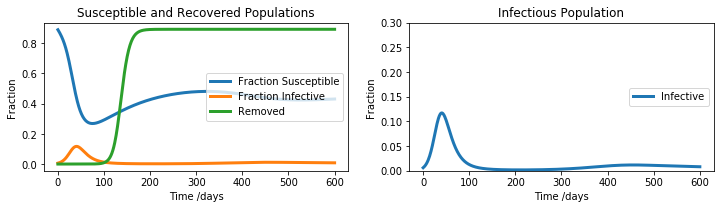

In [16]:
V0 = [19107468,133576,2238956]
N=sum(V0)
t = np.linspace(0, 600, 600)
sir_vax = odeint(SIR_birth_death_vax, V0, t, args=([mu, theta1, beta,gamma],))
s_vax, i_vax, r_vax = sir_vax.T
plotcovid(t, s_vax/N, i_vax/N)

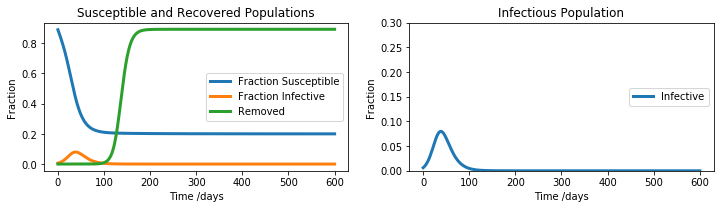

In [17]:
sir_vax = odeint(SIR_birth_death_vax, V0, t, args=([mu, theta2, beta,gamma],))
s_vax, i_vax, r_vax = sir_vax.T
plotcovid(t, s_vax/N, i_vax/N)